# NNW-Übung 1

## 1 Arbeiten mit NumPy

NumPy ist eine Erweiterung von Python für das Rechnen mit Arrays (Matrizen).

Probieren Sie die folgenden Befehle nacheinander (!) aus und vollziehen Sie die Ergebnisse nach:

In [1]:
import numpy as np # numpy heißt jetzt np ... spart Tipparbeit!

In [2]:
W=np.array([[1.,2,3],[3,4,5]])
W.shape #Zeilen, Spalten

(2, 3)

In [3]:
W.shape[0]

2

In [4]:
W.shape[1]

3

In [5]:
W.T

array([[1., 3.],
       [2., 4.],
       [3., 5.]])

In [6]:
W.T.shape # shape ist keine Funktion, sondern eine Eigenschaft

(3, 2)

In [7]:
type(W)

numpy.ndarray

In [8]:
type(W.shape)

tuple

In [9]:
# Aufruf der NumPy-Funktion arange:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
_ # _ steht für den letzten Rückgabewert
_.shape

(10,)

In [11]:
M=np.arange(12).reshape(3,4)
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
M.shape

(3, 4)

In [13]:
M[2,0]

8

In [14]:
M[1,2]

6

In [15]:
M[1,:]

array([4, 5, 6, 7])

In [16]:
M[1]

array([4, 5, 6, 7])

In [17]:
M[:,1] # ergibt Zeile statt Spalte

array([1, 5, 9])

In [18]:
M[:,[1]] # ergibt eine Spalte

array([[1],
       [5],
       [9]])

In [19]:
M[:,[3,0,1,1]]

array([[ 3,  0,  1,  1],
       [ 7,  4,  5,  5],
       [11,  8,  9,  9]])

In [20]:
M[:,2:4] # Spalte 2 bis exklusive Spalte 4

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [21]:
M[-2,:] # 2te Zeile von hinten

array([4, 5, 6, 7])

In [22]:
M[-2:,:] # 2te Zeile von hinten bis Ende

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
M[:,2]=2 # ändern ist möglich

In [24]:
M>4

array([[False, False, False, False],
       [False,  True, False,  True],
       [ True,  True, False,  True]])

In [25]:
M[M>4]

array([ 5,  7,  8,  9, 11])

In [26]:
M[M>4]=-17

In [27]:
M

array([[  0,   1,   2,   3],
       [  4, -17,   2, -17],
       [-17, -17,   2, -17]])

Beachten Sie bei dem nun folgenden Code:
* Die Einrückung (indentation) der Zeilen!
* Die Angabe zusätzlicher Parameter mit Namen der Parameter bei der Funktion   `print`. Was diese Parameter bedeuten, verrät Spyder Ihnen, wenn Sie Strg-I   drücken.

In [28]:
s=0
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        s+=M[i,j]
        print(s,',',sep='',end='')
s

0,1,3,6,10,-7,-5,-22,-39,-56,-54,-71,

-71

In [29]:
def func(x):
    print(x*x)
    return x
func(3)

9


3

## 2 Laden und Plotten der Iris-Daten

In der Vorlesung wird folgende Konvention verwendet:
* Die Merkmale `x1, x2, ...` eines Objekts werden in Spaltenvektoren `x`       gespeichert. Die Merkmale stehen also in den Zeilen.
* Haben wir viele Objekte, z.B. `N` Trainingsbeispiele, so speichern wir       diese Daten in einer Matrix `X`: je Trainingsbeispiel eine Spalte! Das ist   nichts anderes, als das Nebeneinanderschreiben der Merkmalsvektoren           (Spalten) der einzelnen Objekte!
* Die Zielwerte bei supervised learning sollen entsprechend in einer Matrix     `T` (für target) stehen.
  Auf der Moodle-Seite finden Sie die Iris-Daten als _comma-separated-values_   (`.csv`).

1. Schauen Sie sich den Inhalt der Datei an, zum Beispiel mit einem Text-        Editor (wie gedit, mousepad). Gespeichert sind die 4 Merkmale und die        Iris-Art (kodiert als Zahl von 0 bis 2).
   Wie viele Beispiele gibt es je Iris-Art?

2. Laden Sie die Daten in Python mit Hilfe der NumPy-Funktion `loadtxt`. Die    Beschreibung der Parameter der Funktion und des Rückgabewerts finden Sie      im Internet oder durch Drücken von Strg-I.
   Tipp: Sie brauchen (auch) den Parameter `delimiter`.

In [30]:
array=np.loadtxt('iris.csv', delimiter=',')

3. Zerlegen Sie die eingelesen Daten in die Matrizen `X` und `T`.

In [31]:
t=array[:,[4]]
x=array[:,[0,1,2,3]]

4. Stehen die Daten je Blüte in den Zeilen oder Spalten? Passen Sie die Daten    ggf. der Konvention (siehe oben) an.

In [32]:
t=t.T[0]

5. Plotten Sie die ersten beiden Merkmale der Daten mit der Funktion            `scatter` aus dem Modul `matplotlib.pyplot`, das Sie daher zuerst            importieren müssen:

In [33]:
import matplotlib.pyplot as plt

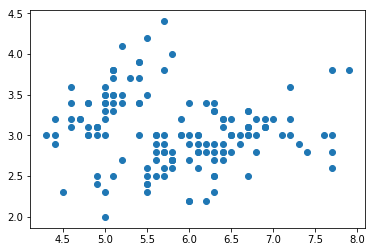

In [34]:
plt.scatter(x[:,0],x[:,1])

6. Färben Sie die drei Iris Arten durch Übergabe der folgenden zusätzlichen      Parameter von `scatter` ein: `c=T, cmap=plt.cm.prism` (unter der Annahme,    dass `matplotlib.pyplot` als `plt` importiert wurde).

   Alternativ können Sie auch selbst eine Color-Map definieren:                  `cmap=colors.ListedColormap(['red', 'green', 'blue']`, wobei Sie vorher      `colors` importieren müssen: `from matplotlib import colors`

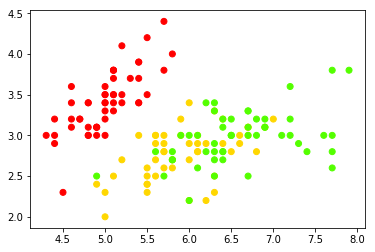

In [35]:
plt.scatter(x[:,0],x[:,1],c=t,cmap=plt.cm.prism)

## Neuron mit voreingestellten Gewichten

Schreiben Sie eine Funktion `neuron(X)`, die die Berechnungen eines Neurons mit zwei festen Gewichten `W=[-0.3,1]` und fester Aktivierungsschwelle von `> 2` für alle Daten (=vermessene Iris-Blüten) in `X` durchführt, wobei als Daten wieder nur die ersten zwei Merkmale je Blüte verwendet werden sollen. Der Rückgabewert soll ein Array mit boolschen Werten (`True`=Neuron sendet Signal, `False`=Neuron sendet kein Signal) sein, das genauso viele `XXX` wie `X` enthält, wobei `XXX` für _Spalten_ oder _Zeilen_ steht.

Tipps/Anmerkungen:

* Legen Sie in der Funktion zunächst ein mit Nullen gefülltes Array `net` an,   das die Netzwerksummen für die einzelnen Blüten aufnehmen soll:               `net=np.zeros(X.shape[XXX])` (`XXX` steht wieder für Spalten oder Zeilen).

* Definieren Sie `W=[-0.3,1]` einfach als lokale Variable der Funktion.

* Benutzen Sie for-Schleifen zur Berechnung der Netzwerksummen `net[n]`,       wobei `n` für die Nummer der Blüte stehen soll.

* Die Anwendung der Aktivierungsschwelle ist dann nur noch eine Zeile, siehe   Aufgabe 1.


Auf der Moodle-Seite finden Sie die Datei `nnwplot.py`. Importieren Sie diese und rufen Sie die darin enthaltenden Funktion `nnwplot.plotTwoFeatures(X,T,neuron)` auf, wobei `X` wie beschrieben nur
zwei Merkmale je Blüte enthalten darf.

Mit `plt.figure()` können Sie neue Plot-Fenster öffnen, damit Sie die verschiedenen Plots zur Beantwortung der folgenden Fragen besser vergleichen können. Wenn dann zuviele Fenster offen sind, können Sie sie mit `plt.close('all')` alle schließen.

In [36]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.3,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>2

In [37]:
# based on: https://github.com/eakbas/tf-svm/blob/master/plot_boundary_on_data.py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors


def plotTwoFeatures(X,T,pred_func):
    if X.ndim!=2:
        raise ValueError('X be a matrix (2 dimensional array).')
#    if X.shape[0]!=2: 
#        X=X.T
    if X.shape[0]!=2:
        raise ValueError('X must contain exactly 2 features.')
        
    # determine canvas borders
    mins = np.amin(X,1); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,1); 
    maxs = maxs + 0.1*maxs;

    ## generate dense grid
    xs,ys = np.meshgrid(np.linspace(mins[0],maxs[0],300), 
            np.linspace(mins[1], maxs[1], 300));


    # evaluate model on the dense grid
    try:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()].T);
    except:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()]);
        
    if Z.ndim>1 and Z.shape[0]>1: # onehot? -> convert
        Z=Z.argmax(0)
    Z = Z.reshape(xs.shape)
    
    if T.ndim>1 and T.shape[0]>1: # onehot? -> convert
        T=T.argmax(0)
        
    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=T, s=50,
            cmap=colors.ListedColormap(['orange', 'blue', 'green']))
    plt.show()


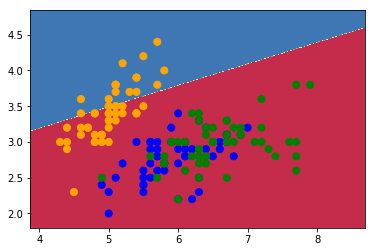

In [38]:
plotTwoFeatures(x[:,[0,1]].T,t,neuron)

1. Experimentieren Sie mit anderen Aktivierungsschwellen als 2, also zum Beispiel 1 und 3. Was ändert sich?

In [39]:
# Grenze verschiebt sich, Steigung bleibt gleich

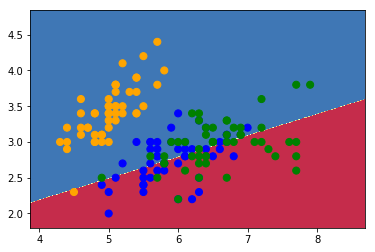

In [40]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.3,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>1

plotTwoFeatures(x[:,[0,1]].T,t,neuron)

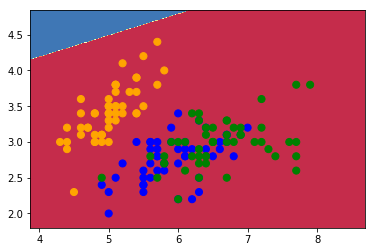

In [41]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.3,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>3

plotTwoFeatures(x[:,[0,1]].T,t,neuron)

2. Experimentieren Sie mit anderen Gewichten W, zum Beispiel `W=[-0.2,1]`,`W=    [-0.1,1]`, `W=[0,1]`.
   Was ändert sich?

In [42]:
# Steigung ändert sich

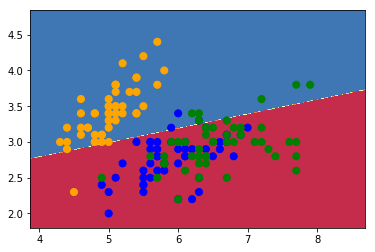

In [43]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.2,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>2

plotTwoFeatures(x[:,[0,1]].T,t,neuron)

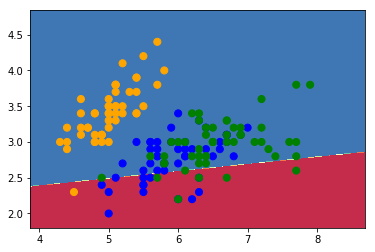

In [44]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.1,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>2

plotTwoFeatures(x[:,[0,1]].T,t,neuron)

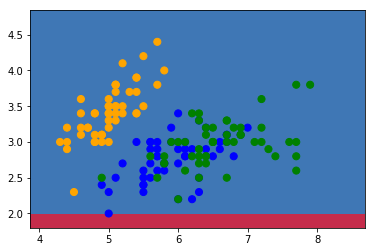

In [45]:
def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[0,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>2

plotTwoFeatures(x[:,[0,1]].T,t,neuron)